In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

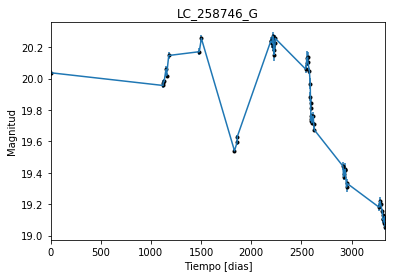

In [2]:
data = np.genfromtxt('LC_258746_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_258746_G')
plt.savefig("LC_258746_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

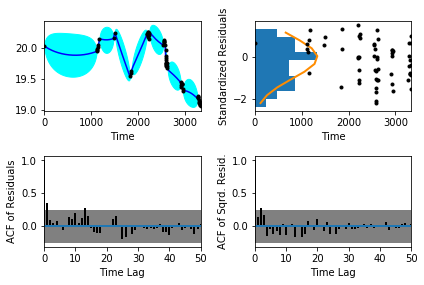

In [5]:
sample.assess_fit()

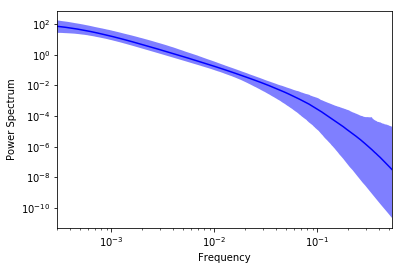

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

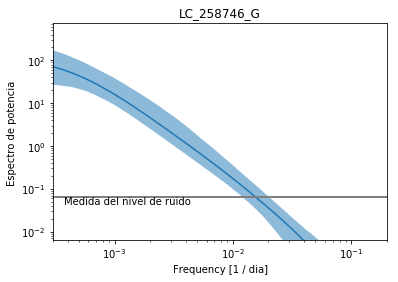

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_258746_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_258746_G')

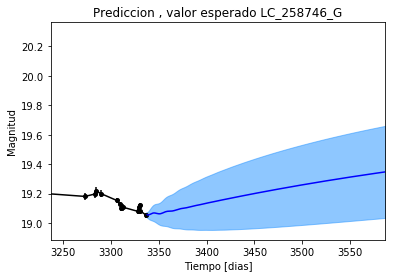

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_258746_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_258746_G')

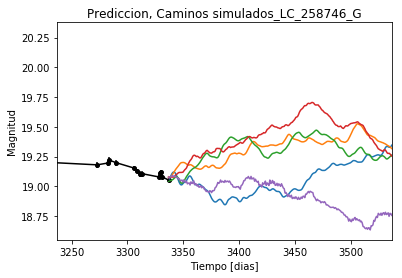

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_258746_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


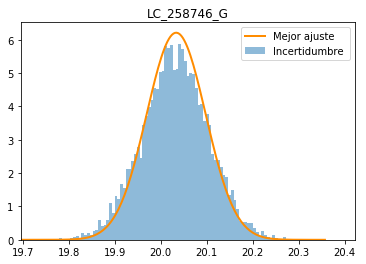

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_258746_G')
plt.savefig("Mejor_ajuste_LC_258746_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_258746_G')

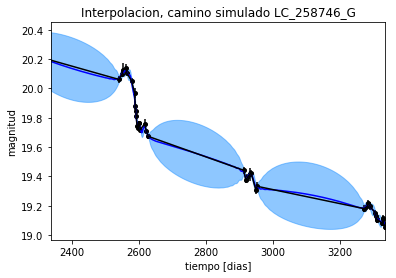

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_258746_G')

Text(0.5,1,'Interpolacion, camino simulado LC_258746_G')

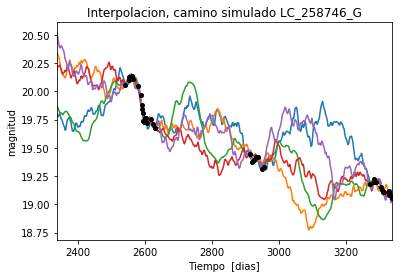

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_258746_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 575.022507719
Median: 0.0860021095777
Standard deviation: 0.224608073092
68% credibility interval: [ 0.01338449  0.36554698]
95% credibility interval: [ 0.00112269  0.86703734]
99% credibility interval: [  3.38573147e-04   1.02709507e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 291.670547861
Median: 0.0160189825062
Standard deviation: 0.136684019928
68% credibility interval: [ 0.00039126  0.10632452]
95% credibility interval: [  3.10318566e-04   5.46436118e-01]
99% credibility interval: [  3.01360828e-04   8.76570054e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 640.211440003
Median: 0.10558315187
Standard devi

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 781.102429593
Median: 113.442915048
Standard deviation: 1.80553482412
68% credibility interval: [ 111.40150838  114.76338939]
95% credibility interval: [ 108.62804138  115.50121671]
99% credibility interval: [ 106.49046956  115.74861041]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 328.055192625
Median: 2.52098268696
Standard deviation: 3.01764714252
68% credibility interval: [ 0.42097173  6.59860492]
95% credibility interval: [  0.10787718  10.40296589]
99% credibility interval: [  0.06724742  13.40091952]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 325.505995696
Median: 4.50453014228
Standard deviation: 13.3280460066
68% credibility interval: [  0.82197605  21.64928052]
95% credibility interval: [  0.1813034

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 761.815470305
Median: 3.20639206119e-27
Standard deviation: 7.91901141585e+24
68% credibility interval: [  3.02419681e-50   3.77947184e-20]
95% credibility interval: [  5.51417137e-83   1.56448285e-02]
99% credibility interval: [  6.30645845e-87   7.82984059e+23]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2558.31679572
Median: 19.7903075118
Standard deviation: 0.188272631496
68% credibility interval: [ 19.60546299  19.96168098]
95% credibility interval: [ 19.39442153  20.13801567]
99% credibility interval: [ 19.2354067   20.29988349]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 271.037812823
Median: 0.0562811390723
Standard deviation: 0.3004851883
68% credibility interval: [ 0.          0.56572776]
95% credibility interval: [ 0.          0.99269345]
99% credibility interval: [ 0.         1.0536748]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 271.037812823
Median: 0.0562811390723
Standard deviation: 0.3004851883
68% credibility interval: [ 0.          0.56572776]
95% credibility interval: [ 0.          0.99269345]
99% credibility interval: [ 0.         1.0536748]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 5018.29029576
Median: 0.0
Standard deviation: 5.30541157771e-05
68% credibilit

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 781.102429593
Median: 113.442915048
Standard deviation: 1.80553482412
68% credibility interval: [ 111.40150838  114.76338939]
95% credibility interval: [ 108.62804138  115.50121671]
99% credibility interval: [ 106.49046956  115.74861041]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 993.756866939
Median: 0.143319127542
Standard deviation: 0.071517383448
68% credibility interval: [ 0.09920501  0.21131024]
95% credibility interval: [ 0.07031576  0.32776696]
99% credibility interval: [ 0.05831529  0.46721922]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 796.435917288
Median: 0.916631164223
Standard deviation: 0.177174851265
68% credibility interval: [ 0.77180873  1.11405534]
95% credibility interval: [ 0.65779604  1.34707408]
99% credibility interval: [ 0.59476072  1.52221874]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 297.844146054
Median: 0.0249595137268
Standard deviation: 0.365844259609
68% credibility interval: [ 0.00331332  0.18711242]
95% credibility interval: [  1.92056420e-04   6.98962821e-01]
99% credibility interval: [  9.27636181e-27   2.96792492e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 575.022507719
Median: (-0.540367191285-0.738362720636j)
Standard deviation: 2.35715884461
68% credibility interval: [-2.29679942+0.j         -0.08409724-0.79897032j]
95% credibility interval: [-5.44775628+0.j         -0.00705408-5.02759193j]
99% credibility interval: [ -6.45342863e+00 -1.53236358e+00j  -2.12731783e-03 -1.52480891e-03j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 291.670547862
Median: (-0.100650235519+3.99930599643j)
Standard deviation: 2.07415426997
68% credibility interval: [-0.66805666+5.57723209j -0.00245833+0.j        ]
95% credibility interval: [ -3.43335939e+00+0.j  -1.94978905e-03+0.j]
99% credibility interval: [ -5.50765209e+00+2.76253301j  -1.89350592e-03+0.j        ]
Posterior summary for